In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
# Test for one person

# Define the API URL for a specific person (e.g., person with ID 1)
api_url = 'https://swapi.dev/api/people/1/'

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    person_data = response.json()

    # Display information about the person
    print("Name:", person_data['name'])
    print("Birth Year:", person_data['birth_year'])
    print("Gender:", person_data['gender'])
    print("Height:", person_data['height'])
    print("Mass:", person_data['mass'])
    print("Hair Color:", person_data['hair_color'])
    print("Eye Color:", person_data['eye_color'])
    print("Skin Color:", person_data['skin_color'])
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Name: Luke Skywalker
Birth Year: 19BBY
Gender: male
Height: 172
Mass: 77
Hair Color: blond
Eye Color: blue
Skin Color: fair


In [ ]:
import requests
import pandas as pd

# Function to fetch data for a specific person
def get_person_data(person_id):
    api_url = f'https://swapi.dev/api/people/{person_id}/'
    response = requests.get(api_url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for person {person_id}. Status code: {response.status_code}")
        return None

# Get the total number of characters
initial_response = requests.get('https://swapi.dev/api/people/')
total_characters = initial_response.json()['count']

# Create an empty DataFrame to store the data
columns = ['Name', 'Birth Year', 'Gender', 'Height', 'Mass', 'Hair Color', 'Eye Color', 'Skin Color']
characters_df = pd.DataFrame(columns=columns)

# Fetch and append data for each person
for person_id in range(1, total_characters + 1):
    person_data = get_person_data(person_id)
    
    if person_data:
        # Append a new row to the DataFrame
        characters_df = characters_df.append({
            'Name': person_data['name'],
            'Birth Year': person_data['birth_year'],
            'Gender': person_data['gender'],
            'Height': person_data['height'],
            'Mass': person_data['mass'],
            'Hair Color': person_data['hair_color'],
            'Eye Color': person_data['eye_color'],
            'Skin Color': person_data['skin_color'],
        }, ignore_index=True)



In [6]:
# Display the resulting DataFrame
characters_df

,Name,Birth Year,Gender,Height,Mass,Hair Color,Eye Color,Skin Color
0,Luke Skywalker,19BBY,male,172,77,blond,blue,fair
1,C-3PO,112BBY,n/a,167,75,n/a,yellow,gold
2,R2-D2,33BBY,n/a,96,32,n/a,red,"white, blue"
3,Darth Vader,41.9BBY,male,202,136,none,yellow,white
4,Leia Organa,19BBY,female,150,49,brown,brown,light
...,...,...,...,...,...,...,...,...
76,Shaak Ti,unknown,female,178,57,none,black,"red, blue, white"
77,Grievous,unknown,male,216,159,none,"green, yellow","brown, white"
78,Tarfful,unknown,male,234,136,brown,blue,brown
79,Raymus Antilles,unknown,male,188,79,brown,brown,light


In [8]:
characters_df['Height'] = pd.to_numeric(characters_df['Height'], errors='coerce')
characters_df['Mass'] = pd.to_numeric(characters_df['Mass'], errors='coerce')

In [12]:
characters_df = characters_df[characters_df['Gender'] != 'none']
#characters_df = characters_df[characters_df['Gender'] != '']


In [16]:
characters_df['Gender'] = characters_df['Gender'].replace('n/a', 'Unidentified')


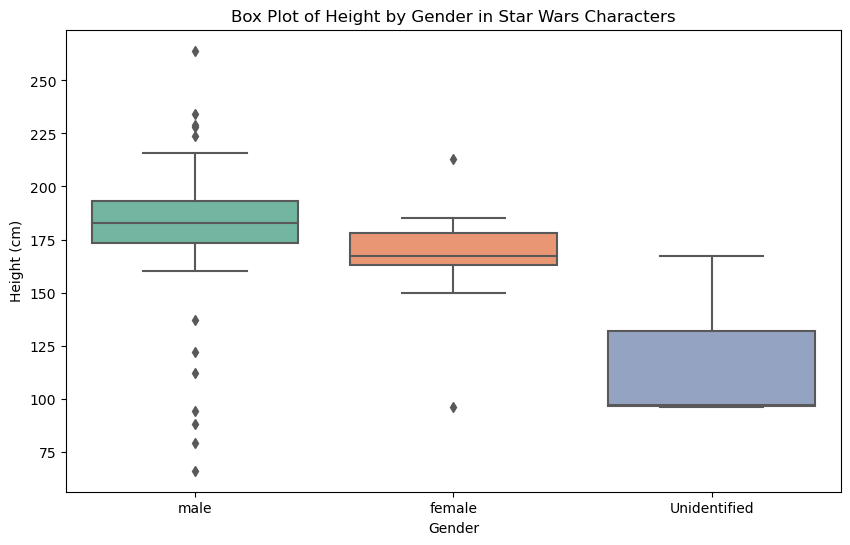

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height', data=characters_df, order=['male', 'female', 'Unidentified'], palette='Set2')
plt.title('Box Plot of Height by Gender in Star Wars Characters')
plt.ylabel('Height (cm)')
plt.show()